In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import interpolate

In [2]:
file_loc = 'J2145_DEIMOS_spectra/*'

In [3]:
spec2d_det2 = []
spec2d_det6 = []

for fl in glob.glob(file_loc):
    if 'clean' in fl:
        if 'det2' in fl:
            spec2d_det2.append(fl)
        elif 'det6' in fl:
            spec2d_det6.append(fl)

In [4]:
spec2d_det2 = sorted(spec2d_det2)
spec2d_det6 = sorted(spec2d_det6)[2:]
spec2d_det2, spec2d_det6

(['J2145_DEIMOS_spectra/J2145_deimos_det2_d0613_0100_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det2_d0613_0101_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det2_d0613_0105_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det2_d0613_0106_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det2_d0614_0105_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det2_d0615_0103_clean.fits'],
 ['J2145_DEIMOS_spectra/J2145_deimos_det6_d0613_0100_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det6_d0613_0101_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det6_d0613_0105_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det6_d0613_0106_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det6_d0614_0105_clean.fits',
  'J2145_DEIMOS_spectra/J2145_deimos_det6_d0615_0103_clean.fits'])

In [76]:
spec_21 = spec2d.Spec2d(spec2d_det2[3], hext=1, varext=2, xtrim=[15, -10])
spec_21.set_dispaxis('y')


Loading file J2145_DEIMOS_spectra/J2145_deimos_det2_d0613_0106_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J2145_DEIMOS_spectra/J2145_deimos_det2_d0613_0106_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 15:-9.  yrange: 0:4096
Final data dimensions (x y): 97 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 97


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




Dispersion : 0.630000
Found 912 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 0

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


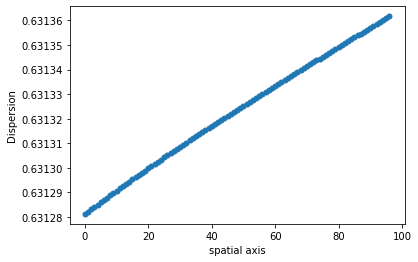

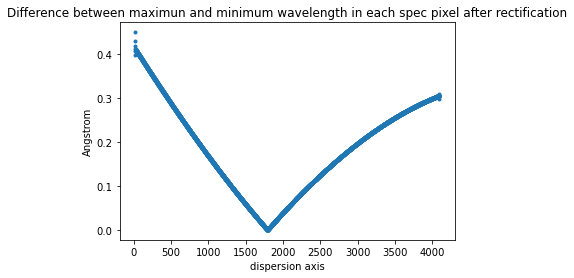

In [77]:
spec_21.do_waverect(doplot=True, resamp_ord=5)

### Check how wavelength vary along spatial direction for a random wavelength value.

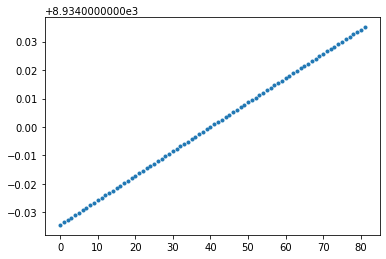

In [49]:
plt.plot(np.arange(spec_21.new_wav2d.shape[1]),
         spec_21.new_wav2d[np.random.randint(0, spec_21.new_wav2d.shape[0])], '.')

Profile max value (before normalization) 2090.540527


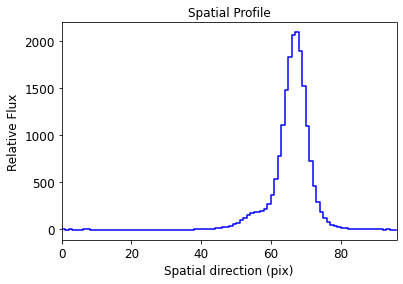

In [78]:
profile_11 = spec_21.spatial_profile(pixrange=[1800, 2200])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 10

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 2200, 68, 3, 4

amplitude=2200.000000, x_0=68.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 250, 55, 2, 3

amplitude=250.000000, x_0=55.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.57034595)>

    [1]: <Moffat1D(amplitude=2107.36182975, x_0=67.55281789, gamma=8.60334485, alpha=4.3630034)>

    [2]: <Moffat1D(amplitude=157.60274055, x_0=56.18

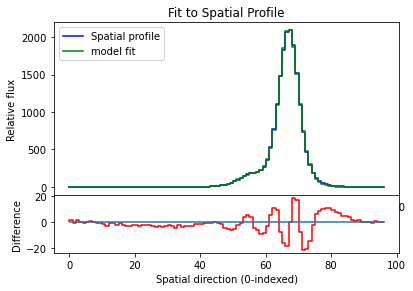

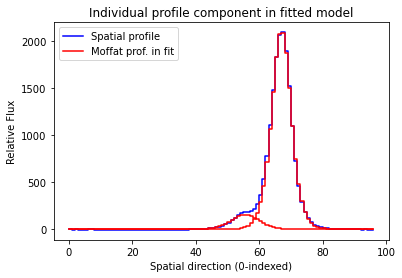


Do you want to start over ? : type yes/no
no


In [79]:
mod_21 = spec_21.initial_model()


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 10

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 3400, 66, 3, 4

amplitude=3400.000000, x_0=66.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 300, 55, 2, 3

amplitude=300.000000, x_0=55.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-2.90131784)>

    [1]: <Moffat1D(amplitude=3509.96887749, x_0=67.37287852, gamma=6.92435628, alpha=3.51084181)>

    [2]: <Moffat1D(amplitude=315.20026153, x_0=55.6

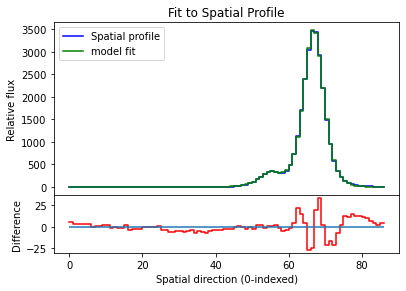

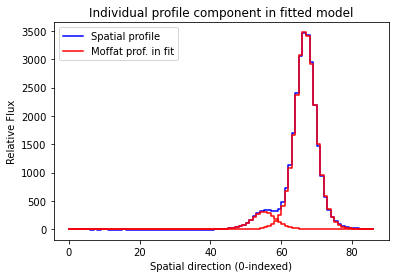


Do you want to start over ? : type yes/no
no


In [63]:
mod_21 = spec_21.initial_model()


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 10

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 1500, 85, 3, 4

amplitude=1500.000000, x_0=85.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 1400, 79, 3, 4

amplitude=1400.000000, x_0=79.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 3 : 200, 70, 3, 4

amplitude=200.000000, x_0=70.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.55110248)>

    [1]: <Moffat1D(amplit

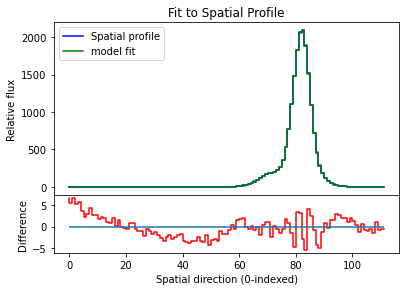

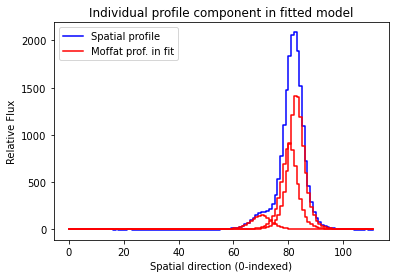


Do you want to start over ? : type yes/no
no


In [31]:
mod_21 = spec_21.initial_model()


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 10

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 1500, 83, 3, 4

amplitude=1500.000000, x_0=83.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 1400, 78, 3, 4

amplitude=1400.000000, x_0=78.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 3 : 200, 68, 2, 3

amplitude=200.000000, x_0=68.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.71891008)>

    [1]: <Moffat1D(amplit

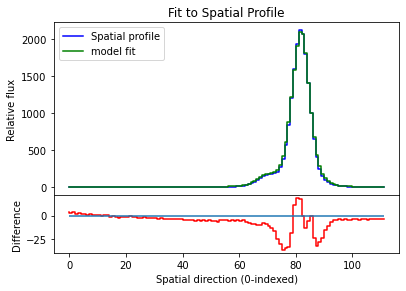

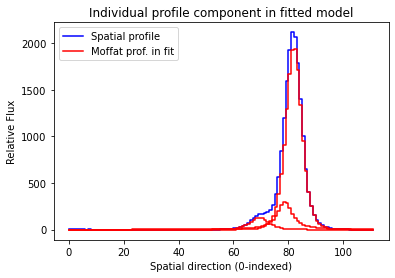


Do you want to start over ? : type yes/no
no


In [14]:
mod_21 = spec_21.initial_model()


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 10

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 2000, 65, 3, 4

amplitude=2000.000000, x_0=65.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 1700, 60, 3, 4

amplitude=1700.000000, x_0=60.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 3 : 250, 51, 2, 3

amplitude=250.000000, x_0=51.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.26609868)>

    [1]: <Moffat1D(amplit

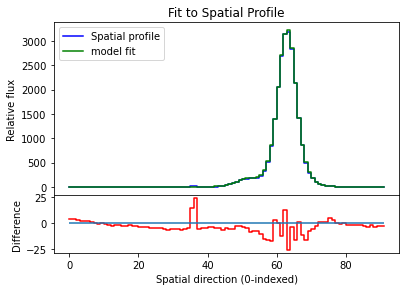

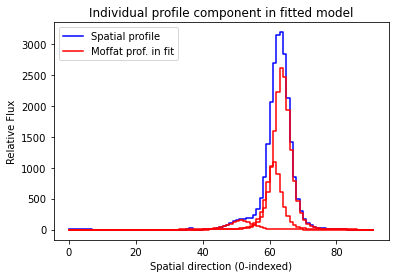


Do you want to start over ? : type yes/no
no


In [8]:
mod_21 = spec_21.initial_model()


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 1200, 65, 3, 4

amplitude=1200.000000, x_0=65.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 1000, 58, 3, 4

amplitude=1000.000000, x_0=58.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 3 : 100, 50, 2, 3

amplitude=100.000000, x_0=50.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.8335222)>

    [1]: <Moffat1D(amplitud

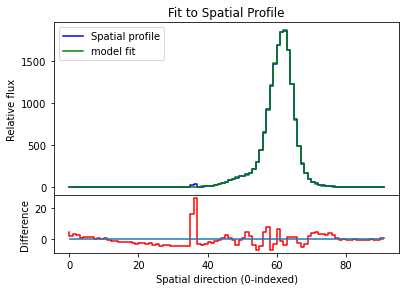

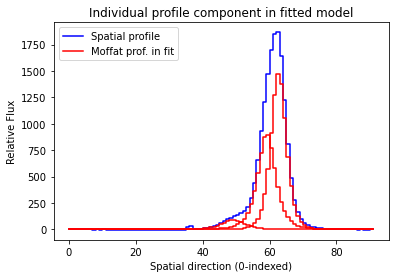


Do you want to start over ? : type yes/no
no


In [118]:
mod_21 = spec_21.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.57034595)>

    [1]: <Moffat1D(amplitude=2107.36182975, x_0=67.55281789, gamma=8.60334485, alpha=4.3630034)>

    [2]: <Moffat1D(amplitude=157.60274055, x_0=56.18013373, gamma=12.1681209, alpha=4.31661898)>
Parameters:
            c0_0           amplitude_1    ...      gamma_2            alpha_2     
    ------------------- ----------------- ... ------------------ -----------------
    -1.5703459466397836 2107.361829747406 ... 12.168120899951898 4.316618981687512

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-2.14685694)>

    [1]: <Moffat1D(amplitude=2110.5060552, x_0=67.54028827, gamma=8.41130582, alpha=4.17046729)>

    [2]: <Moffat1D(amplitude=156.

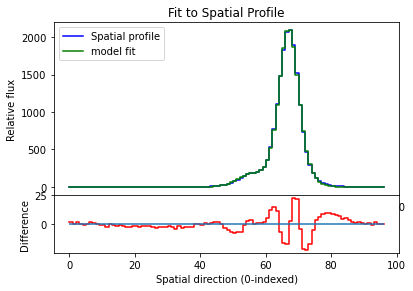

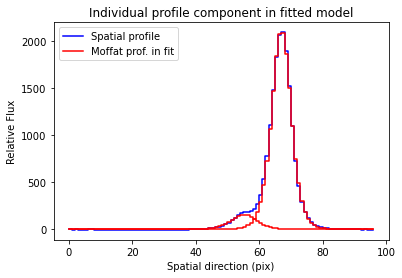

In [80]:
def tie_pos1_moffat(model):
     return model.x_0_1 - (0.3/0.1185)  #0.28
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.4/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_1 - (1.0/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec_21.mod0[2].x_0.tied = tie_pos2_moffat
#spec_21.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[4].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec_21.mod0[2].gamma.tied = tie_gamma_moffat
#spec_21.mod0[2].alpha.tied = tie_alpha_moffat
# spec.mod0[4].gamma.tied = tie_gamma_moffat
# spec.mod0[4].alpha.tied = tie_alpha_moffat
spec_21.refined_model(spec_21.mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


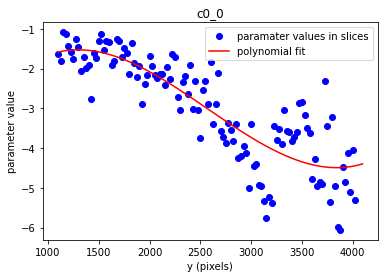

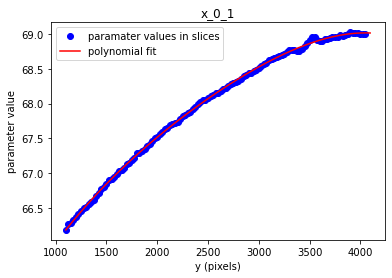

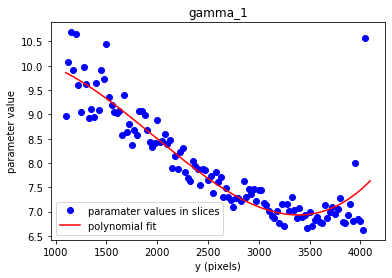

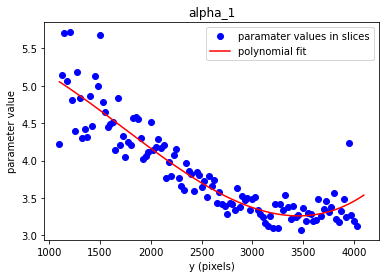

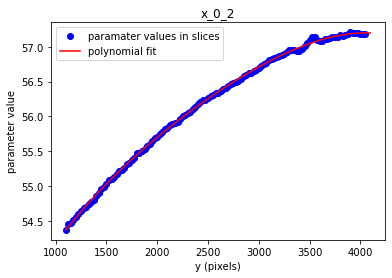

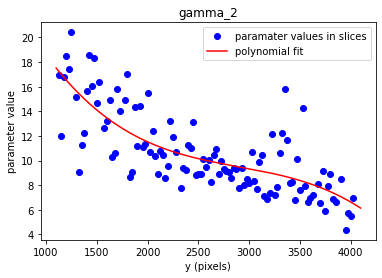

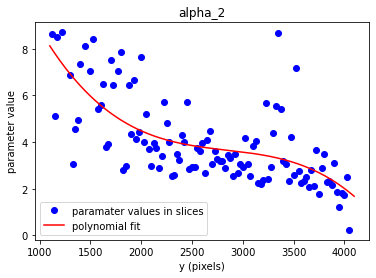

In [82]:
spec_21.find_and_trace(spec_21.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'mean_1':4},
                     fitrange=[1100, -1], polyorder=3)#,

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 1100 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5369.57
 Spectrum End:     7256.35
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63

 Spectrum Start:  5369.57
 Spectrum End:     7256.35
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63


Plotting the spectrum


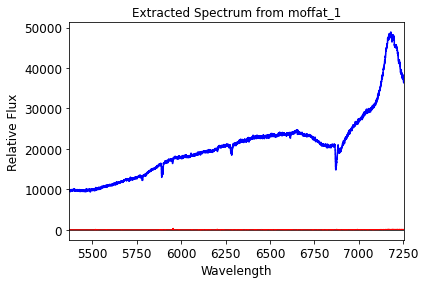

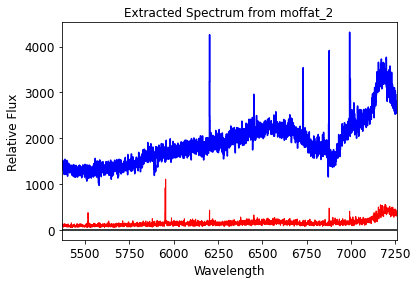

In [83]:
spec_21.extract(method='modelfit', extrange=[1100, -1])

In [84]:
sp_d = spec1d.Spec1d(flux=spec_21.spectra[1][1]['flux'], wav=spec_21.spectra[1][1]['wav'], 
                    var=spec_21.spectra[1][1]['var'], trimsec=[2, -1])

 Spectrum Start:  5370.83
 Spectrum End:     7255.72
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6727.50
[Fe VII]      3761.40       6747.95
H-iota        3770.00       6763.38
H-theta       3797.00       6811.82
H-eta         3835.00       6879.99
CN bandhd     3883.00       6966.10
CaII K        3933.67       7057.00
CaII H        3968.47       7119.44



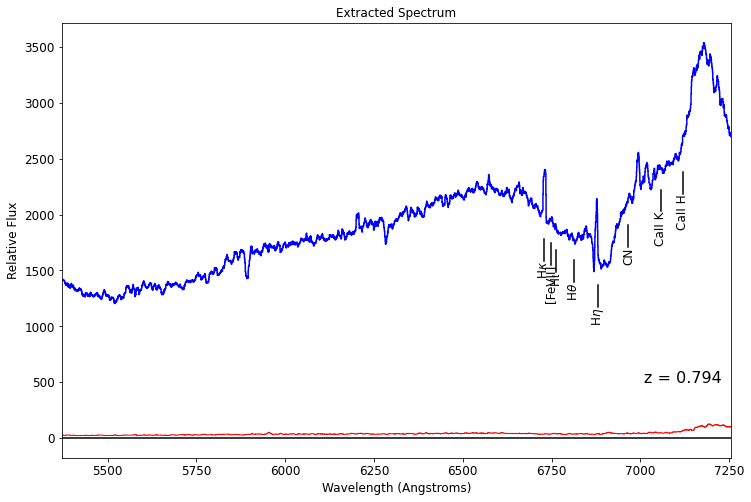

In [86]:
fg = plt.figure(figsize=(12, 8))
sp_d.smooth(13, fig=fg)
sp_d.mark_lines('abs', z=0.794, usesmooth=True, markatm=False);

In [64]:
12*0.1185

1.422